#  **<<< Only Problem 2 and 4 will be graded >>>**


In [143]:
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
%matplotlib inline
import os
from scipy import signal,fftpack
from skimage.io import imread
import cv2

In [167]:
def rect(t):
    return np.where(np.abs(t) <= 0.5, 1, 0)

def u(t):
    return np.array(t > 0, dtype=np.float32)

def delta(t):
    '''delta'''
    return np.where(np.abs(t) < 1e-2, 1, 0)

def ramp(t):
    return np.where(t<0, 0, t)


In [175]:
def show_conv(t,
              x_t,
              h_t,
              name = 'untitled'):
    
    y_t = signal.convolve(x_t, h_t, mode='same') / np.sum(h_t)
    if h_t.__doc__ == 'delta':
        h_t[h_t == 1] = float('inf')
        
    plt.figure(figsize=(20,10))
    plt.subplot(3,1,1)
    plt.title(name)
    plt.ylabel('x*h')
    plt.plot(t, y_t)
    plt.grid()

    plt.subplot(3,1,2)
    plt.ylabel('x')
    plt.plot(t, x_t)
    plt.grid()

    plt.subplot(3,1,3)
    plt.ylabel('h')
    plt.plot(t, h_t)
    plt.grid()

    plt.savefig(name+'.png')

## Problem 1
Evaluate the convolution of the following signals
1. $ \textrm{rect} \left( \frac{t-a}{a} \right) * \delta (t-b)$

2. $\textrm{rect} \left( \frac{t}{a} \right) * \textrm{rect} \left( \frac{t}{a} \right) $

3. $ t[u(t)-u(t-1)]*u(t) $

<!-- 3. $\textrm{rect} \left( \frac{t}{a} \right) * \textrm{sgn}(t) $ -->

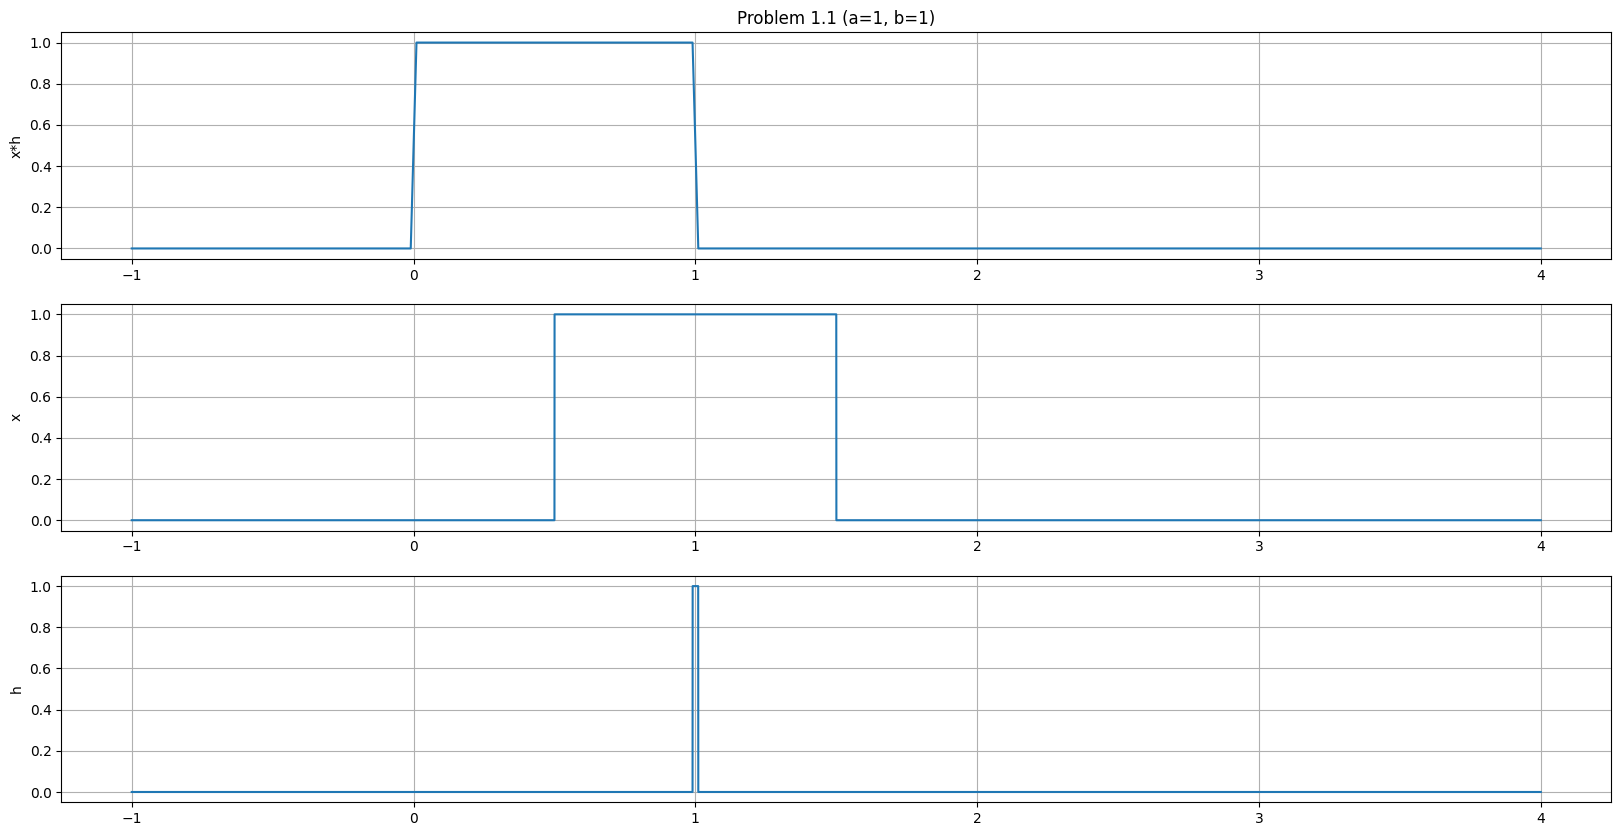

In [146]:
a = 1
b = 1

t = np.linspace(-1, 4, 300000)
t = np.concatenate((t[t<0], [0], t[t>0]))

x_t = rect((t-a)/a)
h_t = delta(t-b)

show_conv(t, x_t, h_t, 'Problem 1.1 (a=1, b=1)')


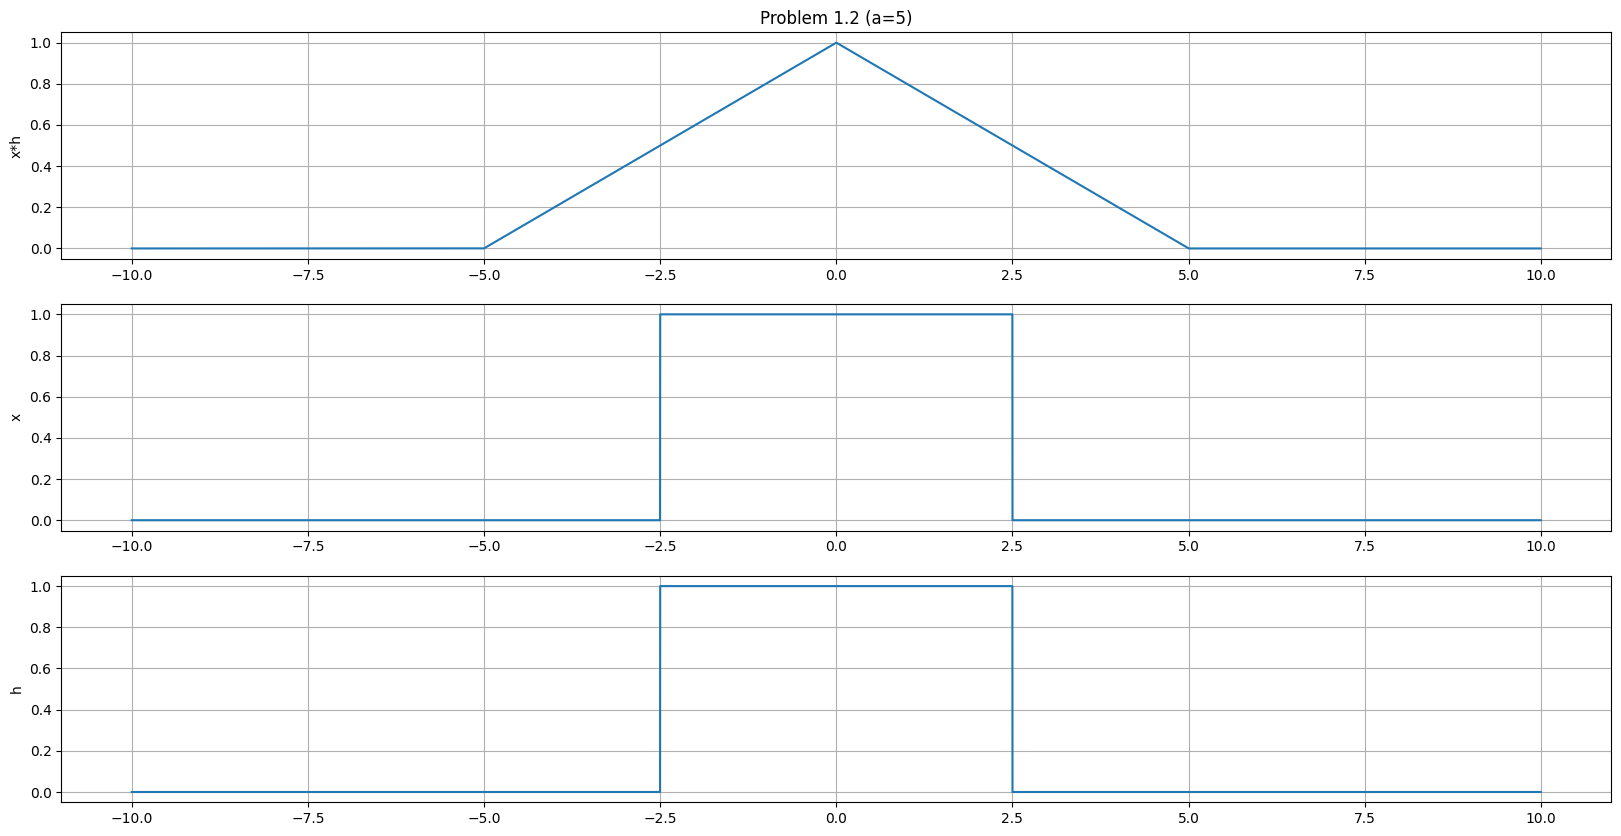

In [147]:
a = 5

t = np.linspace(-10, 10, 10000)
t = np.concatenate((t[t<0], [0], t[t>0]))

x_t = rect((t)/a)
h_t = rect((t)/a)

show_conv(t, x_t, h_t, 'Problem 1.2 (a=5)')

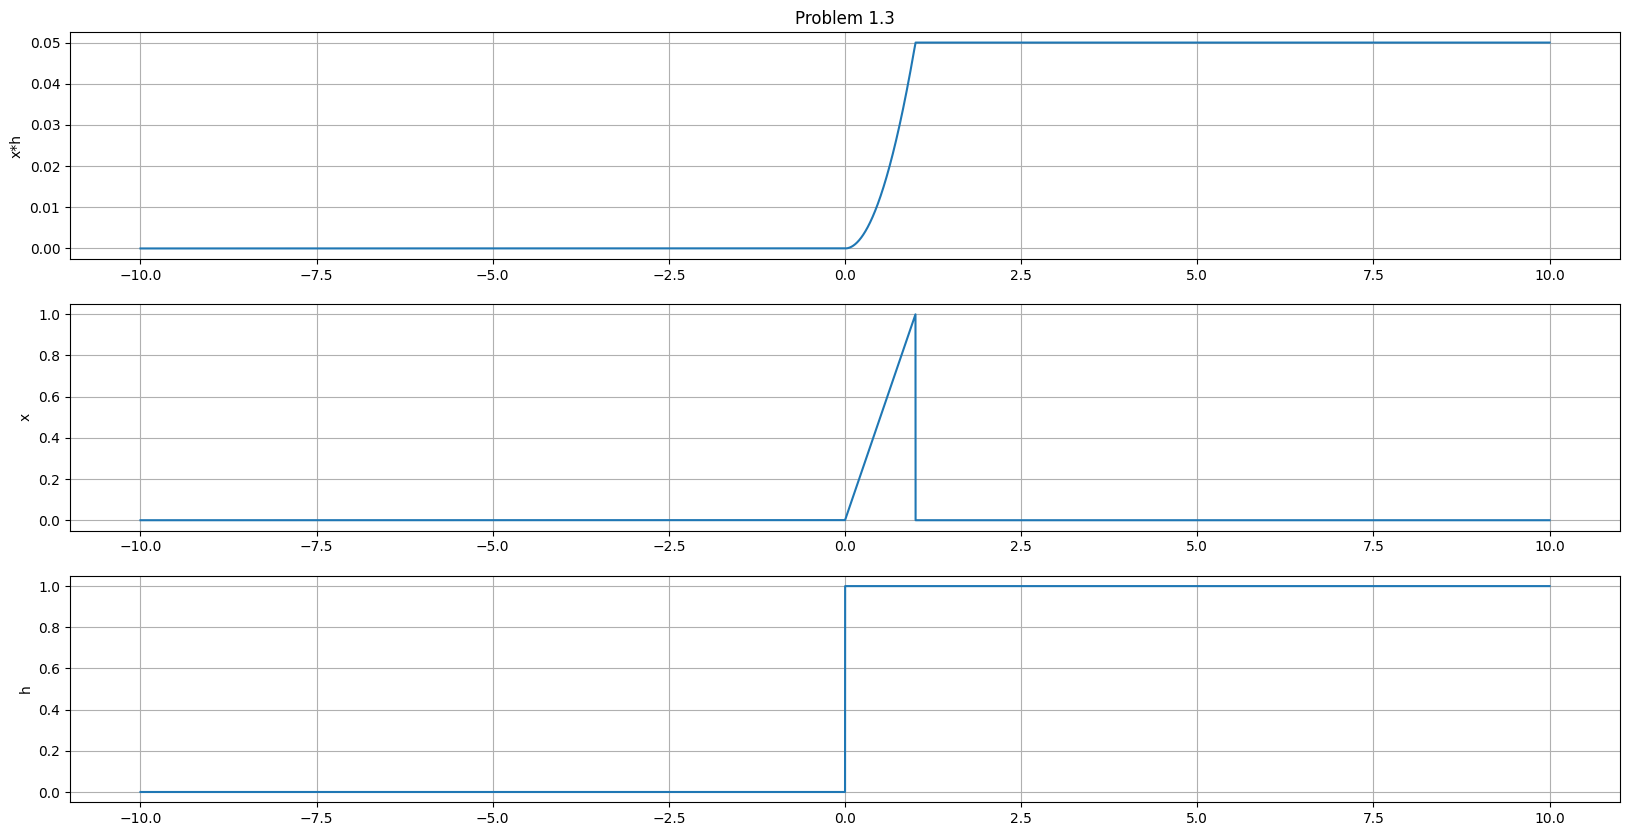

In [148]:
t = np.linspace(-10, 10, 100000)
t = np.concatenate((t[t<0], [0], t[t>0]))

x_t = t*(u(t) - u(t-1))
h_t = u(t)

show_conv(t, x_t, h_t, 'Problem 1.3')

## Problem 2
Determine the convolution $y(t) = h(t)*x(t)$ using Graphical Interpretation of the pairs of the signals shown

1. <a href="https://imgbb.com/"><img src="https://i.ibb.co/YDVdjT1/ii-1.jpg" alt="ii-1" border="0"></a>

2. <a href="https://imgbb.com/"><img src="https://i.ibb.co/102mFqd/ii-2.jpg" alt="ii-2" border="0"></a>


---

## [optional]

3. <a href="https://imgbb.com/"><img src="https://i.ibb.co/vDsDW2z/ii-3.jpg" alt="ii-3" border="0"></a>

4. <a href="https://imgbb.com/"><img src="https://i.ibb.co/fdND0Dv/ii-4.jpg" alt="ii-4" border="0"></a>



In [ ]:
t = np.linspace(-5, 5, 1000)
t = np.concatenate((t[t<0], [0], t[t>0]))

x_t = rect(t/2)
h_t = rect(t/2)
h_t[:h_t.shape[0]//2] *= -1

show_conv(t, x_t/100, h_t, 'Problem 2.1')

In [ ]:
t = np.linspace(-5, 5, 1000)
t = np.concatenate((t[t<0], [0], t[t>0]))

x_t = ramp(t) - u(t-1)*ramp(t)
h_t = rect(t/2)

show_conv(t, x_t, h_t, 'Problem 2.2')

In [ ]:
t = np.linspace(-5, 5, 1000)
t = np.concatenate((t[t<0], [0], t[t>0]))

x_t = rect(t+0.5) + delta(t-2)
h_t = rect(t/2)

show_conv(t, x_t, h_t, 'Problem 2.3 (all near zero number must be 1 but don\'t know how to fix)')


## Problem 3
Let $f(t)$ and $g(t)$ be given as follows:

---

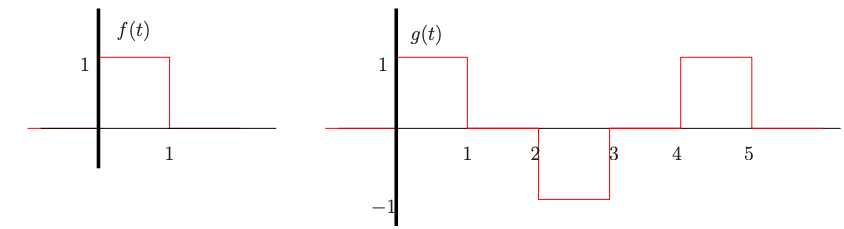

1. sketch the function : $x(t)$ = $f(t)*g(t)$
2. show that if $a(t) = b(t)*c(t)$,then $(Mb(t))*c(t) = Ma(t)$, for any real number M (hint: use the convolution integral formula)


## Problem 4
Find the convolution $y[n] = h[n]*x[n]$ of the following signals:

1.
$x[n] = \begin{cases} -1 , -5 \leq n \leq -1 \\ 1 , 0 \leq n \leq 4 \end{cases} h[n]=2u[n]$

2.
$x[n] = \left( \frac{1}{2} \right)^n u[n],\, h[n] = \delta[n] +\delta[n-1] +  \left( \frac{1}{3} \right)^n u[n]$
---
## [optional]
3.
$x[n] = u[n],\, h[n] = 1 \; ; 0 \leq n \leq 9 $

4.
$x[n] = \left( \frac{1}{3} \right)^n u[n],\, h[n] = \delta[n] + \left( \frac{1}{2} \right)^n u[n]$



## Problem 5
Find the convolution $y[n] = h[n]*x[n]$ of the following signals
1.
$x[n] = \left\{ 1,-\frac{1}{2},\frac{1}{4},-\frac{1}{8} ,\frac{1}{16} \right \},\, h[n]=\left\{ 1,-1,1,-1 \right\}$

1.
$x[n] = \left\{ 1,2,3,0,-1, \right \},\, h[n]=\left\{ 2,-1,3,1,-2 \right\}$

1.
$x[n] = \left\{ 3,\frac{1}{2},-\frac{1}{4},1,4 \right \},\, h[n]=\left\{ 2,-1,\frac{1}{2}, -\frac{1}{2} \right\}$

1.
$x[n] = \left\{ -1,\frac{1}{2},\frac{3}{4},-\frac{1}{5},1 \right \},\, h[n]=\left\{ 1,1,1,1,1 \right\}$



## Problem 6





### Problem 6.1 : Convolution - 1D
The following code creates a gaussian pulse and its self convolutions. Study and apply the convolution between signal e and another signal e with noise (e_noise) and write the report to analyze the results.

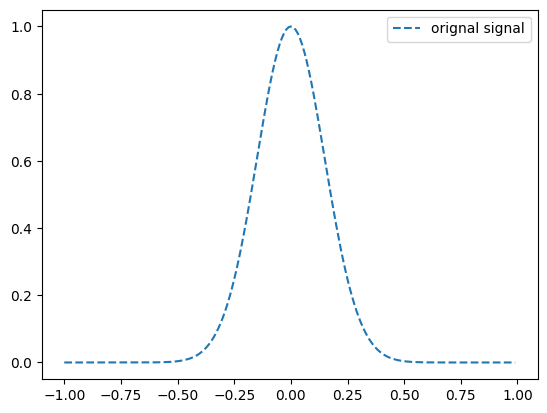

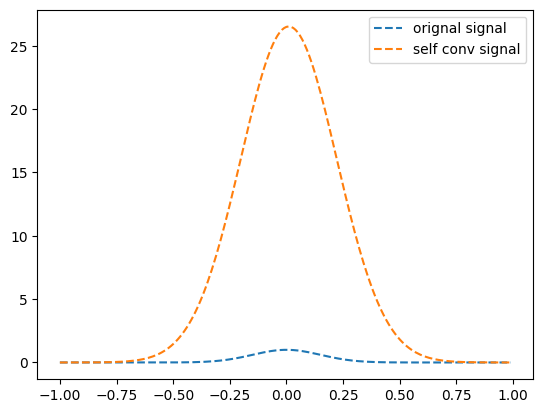

In [211]:
t = np.linspace(-1, 1, 2 * 100, endpoint=False)
i, q, e = signal.gausspulse(t, fc=5, retquad=True, retenv=True)
plt.plot(t, e, '--',label = 'orignal signal')
plt.legend(loc='upper right')
plt.show()


conv_e = np.convolve(e,e,'same')
plt.plot(t, e, '--',label = 'orignal signal')
plt.plot(t, conv_e, '--',label = 'self conv signal')
plt.legend(loc='upper right')
plt.show()

# TODO : Apply the convolution between signal e and another signal e with noise (e_noise) and check the results


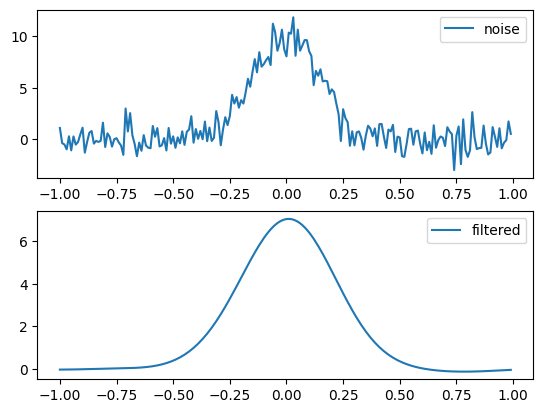

"\nfor low noise it's seem like gaussian kernel can denoise \n"

In [213]:
NOISE = 1.e-1
e_noise = (e + np.random.randn(len(e))*NOISE) *10
conv_e_noise = np.convolve(e,e_noise,'same')

plt.subplot(2,1,1)
plt.plot(t, e_noise, label = 'noise')
plt.legend()
plt.subplot(2,1,2)
plt.plot(t, conv_e_noise/np.sum(e), label = 'filtered')
plt.legend()
plt.show()

'''
for low noise it's seem like gaussian kernel can denoise 
'''

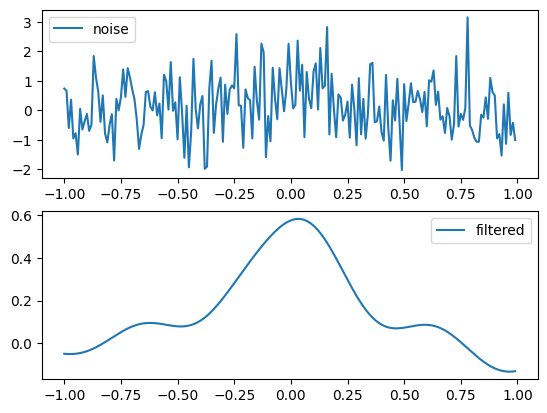

'\nthis case noise size is likely equal to the original signal -> guassian would like to give up :P\n'

In [247]:
NOISE = 1
e_noise = (e + np.random.randn(len(e))*NOISE)
conv_e_noise = np.convolve(e,e_noise,'same')

plt.subplot(2,1,1)
plt.plot(t, e_noise, label = 'noise')
plt.legend()
plt.subplot(2,1,2)
plt.plot(t, conv_e_noise/np.sum(e), label = 'filtered')
plt.legend()
plt.show()

'''
this case noise size is likely equal to the original signal -> guassian would like to give up :P
'''

### Problem 6.2

From the self convolution below, when increasing the number of self convolution (now is 8), what is noticeable from the final shape resulted from the convolution?

(HINT 01: Central limit theorem)

(HINT 02: What is Probability Density Function (PDF) of $z$ if $z=x+y$ $?$ )

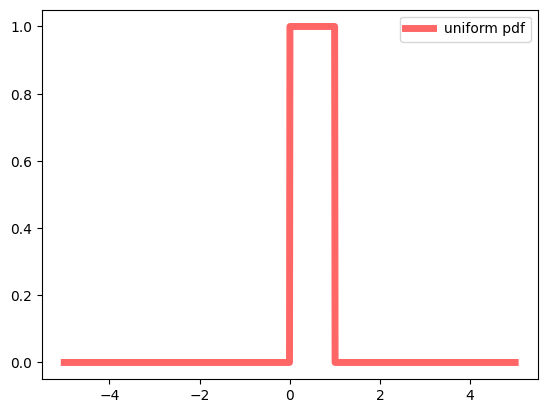

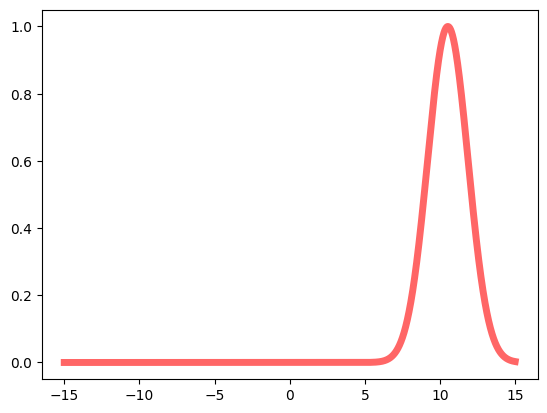

In [252]:
from scipy.stats import uniform

x = np.linspace(-5,5, 1000)
plt.plot(x, uniform.pdf(x),
       'r-', lw=5, alpha=0.6, label='uniform pdf')

plt.legend()
plt.show()


x = np.linspace(-15,15, 10000)
pdf_1 = uniform.pdf(x)
pdf_2 = uniform.pdf(x)

ITER = 20
for i in range(ITER):
    pdf_2 = np.convolve(pdf_2,pdf_1, 'same')

pdf_2 = pdf_2/np.max(pdf_2)
plt.plot(x, pdf_2,'r-', lw=5, alpha=0.6, label='conv uniform')

## Problem 7
### 2D (image) signal convolution:
The following code show the 2D signal (image f(x,y)) and a kernel (diag_line). Study the convolution of the kernel and the image. Apply with "circuits.png" image and analyze the results.



## TODO : Apply diag_line to the "circuits.png image" and analyse the results

In [254]:
!wget -nc 'https://drive.google.com/uc?id=1hQ8uKocLTjaKmrJm-O4BfZxvLLM1Cfa-' -O circuits.png
!wget -nc 'https://drive.google.com/uc?id=1WoISJ6-FECt-gt6Ovjlfmz89oGH812GM' -O hamtaro0.jpg

File ‘circuits.png’ already there; not retrieving.


File ‘hamtaro0.jpg’ already there; not retrieving.


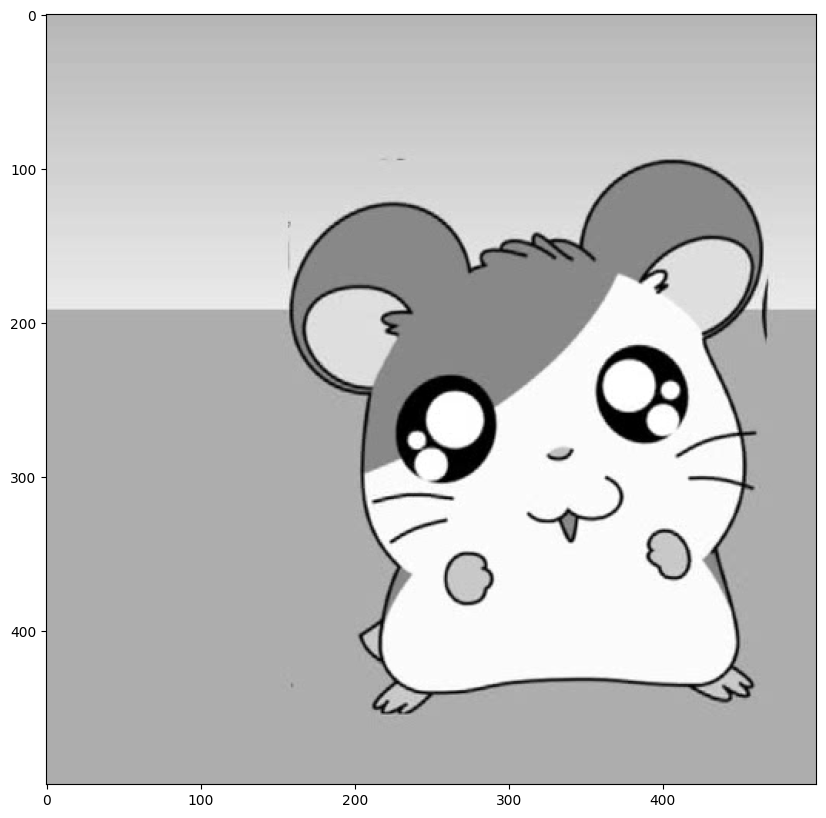

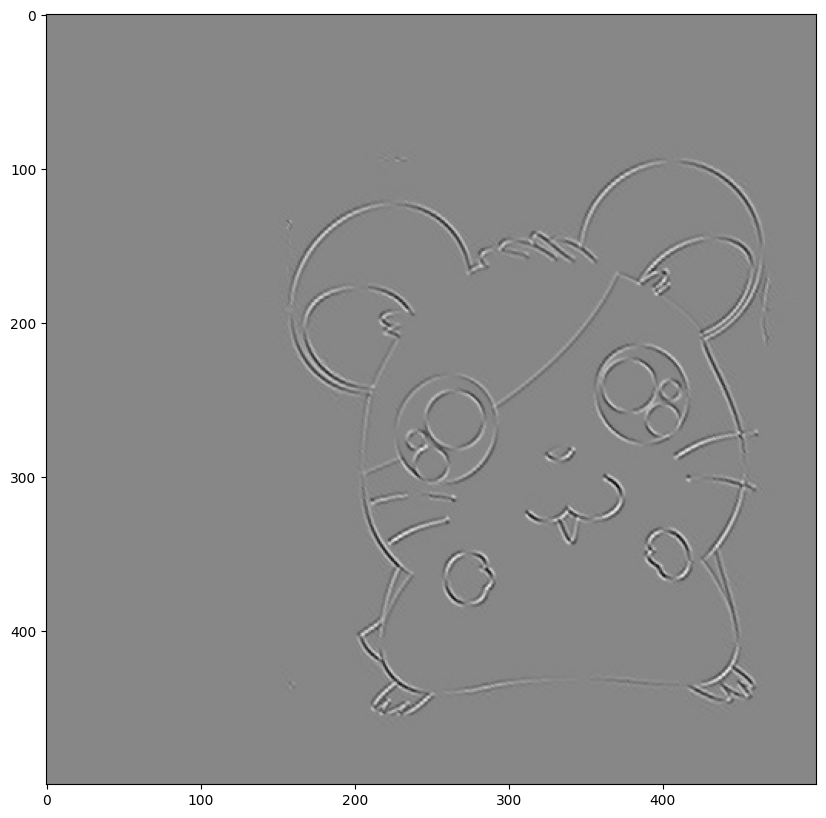

In [259]:
image_path = ['circuits.png', 'hamtaro0.jpg']
image_path = image_path[1]

diag_line = np.array([[ 2, -1, -1],
                    [-1, 2, -1],
                    [-1, -1, 2]])

ham = cv2.imread(image_path,0)
plt.figure(figsize=(10,10))
plt.imshow(ham, cmap='gray')
plt.show()
grad = signal.convolve2d(ham,diag_line,boundary='symm',mode='same')
plt.figure(figsize=(10,10))
plt.imshow(grad, cmap='gray')
plt.show()

# TODO : Apply diag_line to the "circuits.png image" and analyse the results




## Problem 8
Are the following systems linear or time invariant?
1. $x(t)$ -> **System(a)** -> $7x(t-1)$
1. $x(t)$ -> **System(b)** -> $cos(2x(t))$
1. $x(t)$ -> **System(c)** -> $t$
1. $x(t)$ -> **System(d)** -> $x(t)+t$